In [3]:
import wfdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from biosppy.signals import ecg

# poincare plot
df = pd.read_csv('data/mit-bih/compiled_mit_bih.csv')
all_signals = df.drop(columns=['label']).values


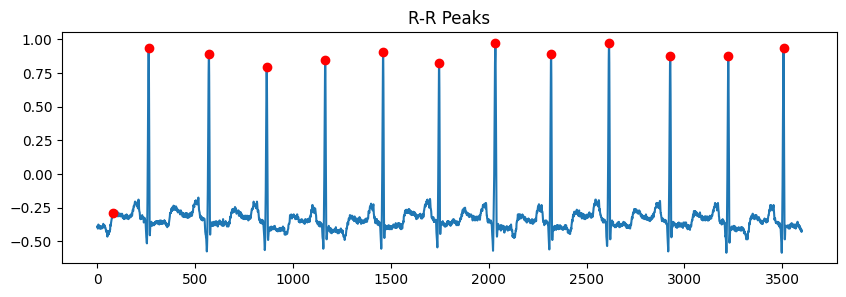

In [13]:
from scipy.signal import find_peaks, butter, filtfilt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# R-R interval computation function
def compute_rr_intervals(signals, prominence=0, height=0, distance=0.6, sampling_rate=300):
    r_peaks, _ = find_peaks(signals, prominence=prominence, distance=int(distance * sampling_rate))
    rr_intervals = np.diff(r_peaks / sampling_rate)
    return rr_intervals, r_peaks

rr_intervals, r_peaks = compute_rr_intervals(all_signals[0])

# plot the graph with the rr peaks
plt.figure(figsize=(10, 3))
plt.plot(all_signals[0])
plt.plot(r_peaks, all_signals[0][r_peaks], 'ro')
plt.title('R-R Peaks')
plt.show()
